# Modelo pre entrenado

Pregunta 1: Luego de hacer la predicción: predictions = model.predict(image_array)

Imprimir el resultado de la predicción de la celda Y=6, X=3. ¿Cuál es el resultado?

Pregunta 2: Del resultado de la predicción de la pregunta anterior, cuál es la probabilidad de un objeto dado que el resultado obtenido en la predicción es antes de aplicar la sigmoidea (la primera neurona de salida corresponede a esta predicción).

Pregunta 3: Dado que las últimas 4 neuronas de la salida predicen la bounding box.

¿Cuál es la altura de la bounding box en píxeles?

Pregunta 4: El resto de las neuronas corresponde a la predicción de la clase antes de aplicar la softmax.

¿Cúal es la probabilidad de que sea una vaquita de san antonio?

# Descargo de Drive:

In [3]:
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/yolo_helper.py
! wget https://github.com/lab-ml-itba/9-YOLO-intro/raw/master/ladybugs_3.jpg
! wget https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/Object_Detection.py

--2021-09-28 14:00:02--  https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/yolo_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28832 (28K) [text/plain]
Saving to: ‘yolo_helper.py’

yolo_helper.py      100%[===================>]  28.16K  --.-KB/s    in 0.002s  

2021-09-28 14:00:02 (12.6 MB/s) - ‘yolo_helper.py’ saved [28832/28832]

--2021-09-28 14:00:02--  https://github.com/lab-ml-itba/9-YOLO-intro/raw/master/ladybugs_3.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-ml-itba/9-YOLO-intro/master/ladybugs_3.jpg [following]
--2021-09-28 14:00:02--  https://raw.gi

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pesos de la red entrenada:
Hacer click y agregar al drive personal:
 
https://drive.google.com/open?id=1Nzz6UnVx1qCRQ8I6NhL1L8O0gtlvFxwp

In [7]:
from PIL import Image
from yolo_helper import plot_batch_with_predictions, get_YOLO_V2_NN, plot_bboxes, getIUO
from Object_Detection import ObjectDectection
import numpy as np

In [5]:
classes_names = {
    'n02165456': 'Vaquita de san antonio',
    'n02226429': 'grillo',
    'n01644373': 'sapo',
    'n02279972': 'mariposa',
    'n01632458': 'salamandra',
    'n02256656': 'chicharra',
    'n01774384': 'viuda negra',
    'n01770393': 'escorpion'
}
idx_2_class_id = {0: 'n02165456',
 1: 'n02226429',
 2: 'n01644373',
 3: 'n02279972',
 4: 'n01632458',
 5: 'n02256656',
 6: 'n01774384',
 7: 'n01770393'}

406 642


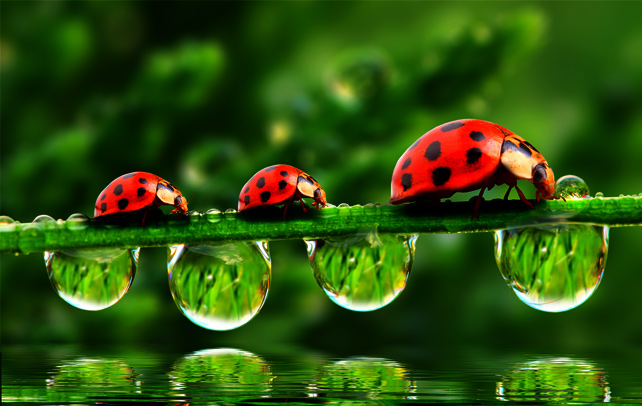

In [6]:
image = Image.open('ladybugs_3.jpg')
print(image.height, image.width)
image

In [7]:
from yolo_helper import get_YOLO_V2_NN
n_classes = len(classes_names)
GRID_H,  GRID_W  = int(np.round(image.height / 32)) , int(np.round(image.width / 32))
IMAGE_H, IMAGE_W = GRID_H*32, GRID_W*32
target_size = (IMAGE_H, IMAGE_W)

BOX = 1
CLASS = n_classes

object_detection = ObjectDectection(n_classes, IMAGE_H, IMAGE_W, BOX, ARQUITECTURE='YOLO_V2')
model = object_detection.model

print(IMAGE_H, IMAGE_W)
print(GRID_H,  GRID_W)
model.layers[-1].output

416 640
13 20


<KerasTensor: shape=(None, 13, 20, 1, 13) dtype=float32 (created by layer 'reshape')>

In [8]:
model.load_weights('/content/drive/My Drive/DeepLearning/Laboratorios/weights_yolo_loss_bigger_dataset.hdf5') 

In [9]:
image_array = np.array(image.resize([IMAGE_W,IMAGE_H])).reshape(1, IMAGE_H, IMAGE_W, 3)/255

In [10]:
predictions = model.predict(image_array)

In [11]:
predictions[0,6,3]

array([[ 0.09825724, 16.074598  , -2.4107344 ,  3.7844892 , -0.9120445 ,
        -1.3392069 , -3.7713625 , -3.342762  , -2.9837744 ,  1.068674  ,
         0.44184053,  3.3858967 ,  2.1442645 ]], dtype=float32)

* Respuesta 1:

```
array([[ 0.09825724, 16.074598  , -2.4107344 ,  3.7844892 , -0.9120445 ,
        -1.3392069 , -3.7713625 , -3.342762  , -2.9837744 ,  1.068674  ,
         0.44184053,  3.3858967 ,  2.1442645 ]], dtype=float32)
```
La respuesta aleatoria que le da al profesor es:

````
[ 0.16070852, 16.141407 , -2.1536047 , 3.703119 , -1.2744118 ,
 -1.2692316 , -3.8594344 , -3.5081904 , -2.9777584 , 1.0775151 ,
  0.43345296, 3.3593547 , 2.146415
````
y sobre esta respuesta hay que fundar la siguiente solución.

* Respuesta 2:

Cuando la sigmoidea tiende a +infinito = 1 , cuando tiende a -infinito =0 y cuando tiende a 0 = 0.5; entonces como el primer resultado es 0.16, significa que la sigmoidea va a dar un resultado superior a 0.5+
````
Respuesta =0.52
````

In [12]:
predictions.shape

(1, 13, 20, 1, 13)

* Respuesta 3:

Para esta pregunta, hay que fijarse cual es la dimensión en pixeles de cada caja,la imagen original es de 406x642 y en el pooling final queda de 13x20, entonces cada caja tiene (406/13)x(642/20) o sea: 31.23x32.1 pixeles.
Ahora bien, sabemos que los 4 últimos valores del array corresponden a la bounding box, el primero corresponde al valor de X, el segundo al de Y, el tercero ancho y el último alto, el último valor vale 2.14, pero eso esta medido en cajas no en pixeles, como la altura de una cajita es 32.1 entonces la BB tiene aproximadamente 68.69 pixeles de alto.
````
Altura de la bounding box en píxeles= 68.69
````

* Respuesta 4:

`` La probabilidad de que sea una Vaquita de San Antonio es 1``

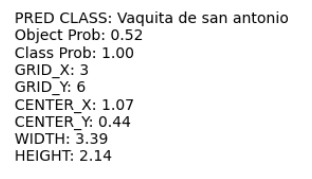

In [9]:
image_1 = Image.open('Array.png')
image_1

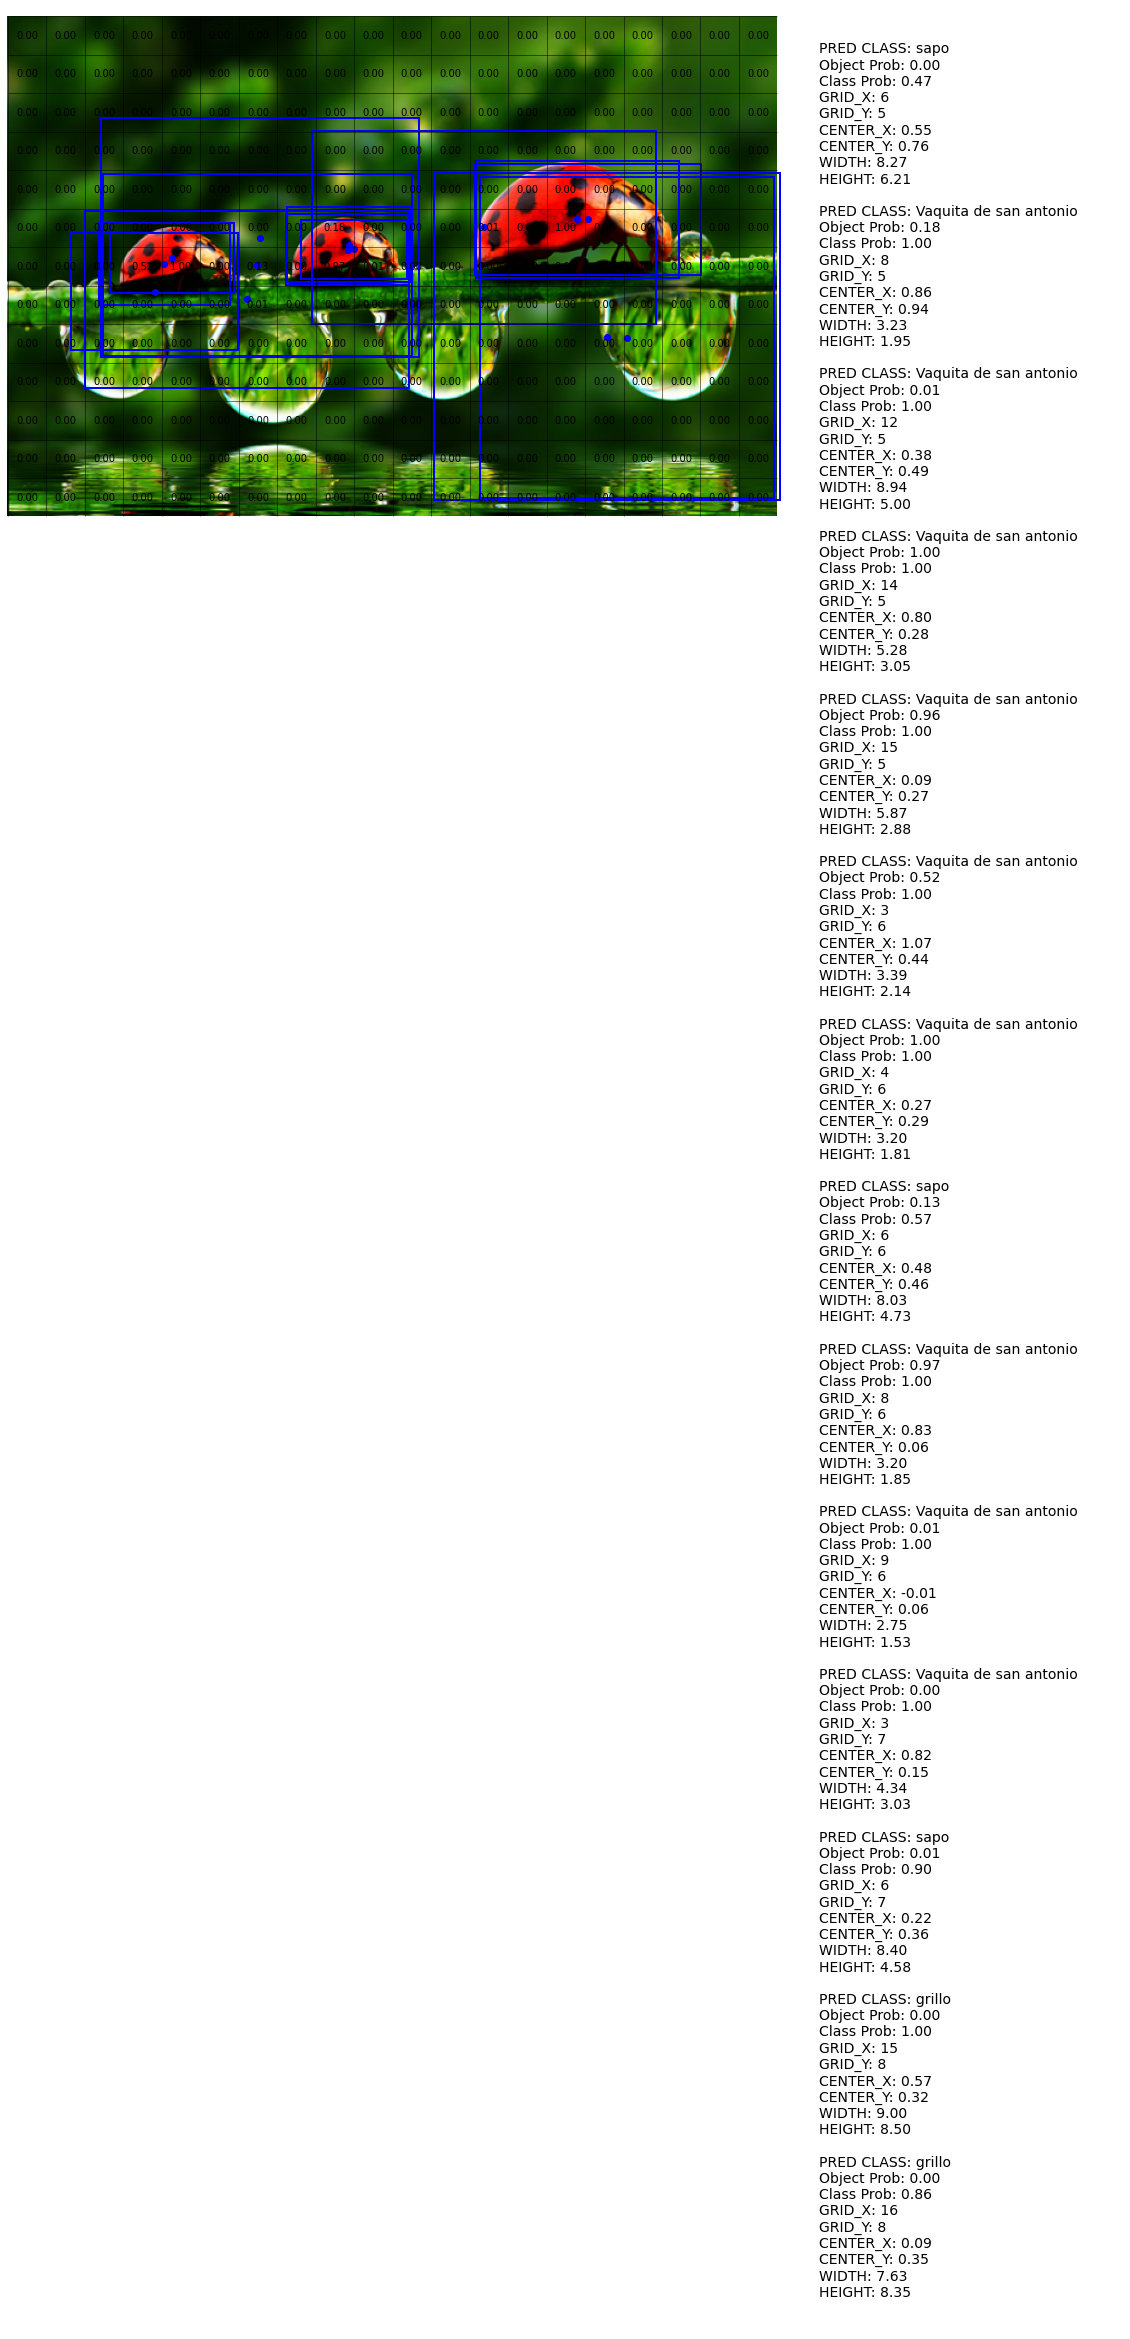

In [13]:
pred_processed = plot_bboxes(image_array[0], predictions[0], idx_2_class_id, classes_names, thres=0.001)

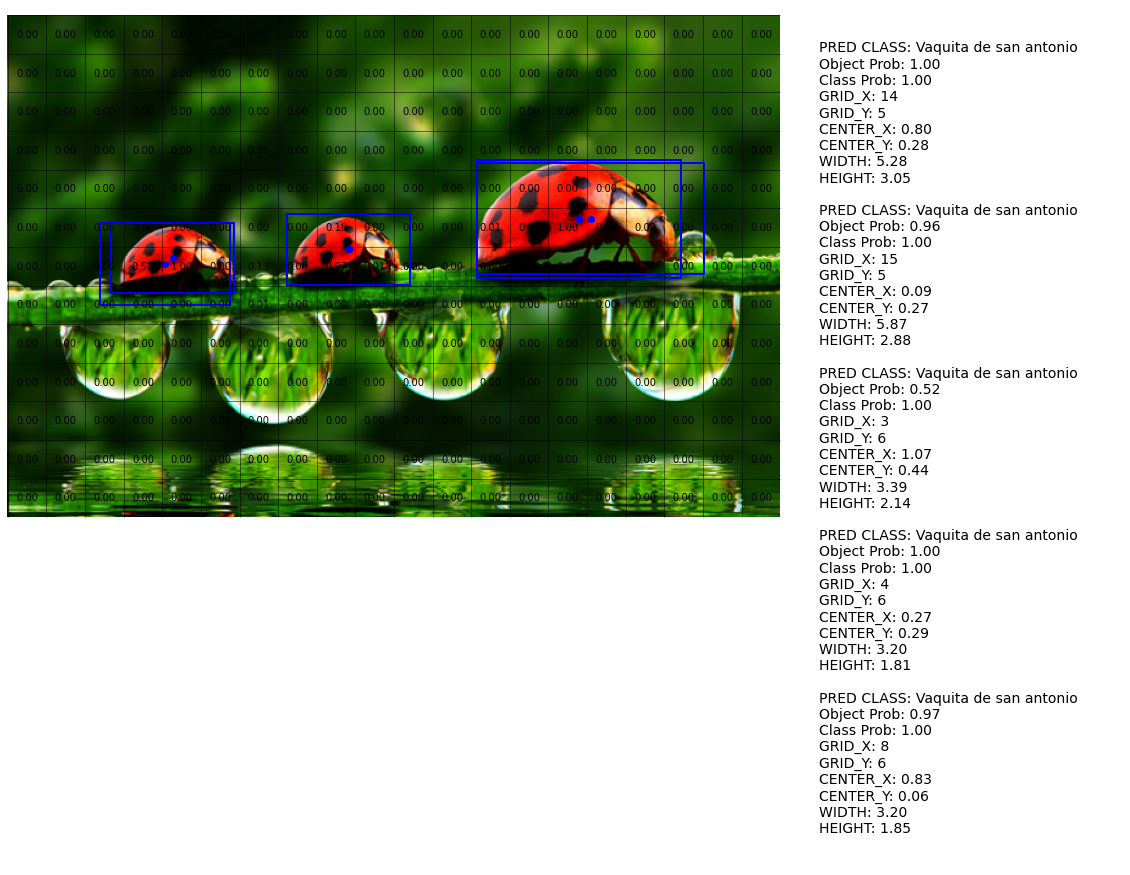

In [14]:
pred_processed = plot_bboxes(image_array[0], predictions[0], idx_2_class_id, classes_names, thres=0.5)

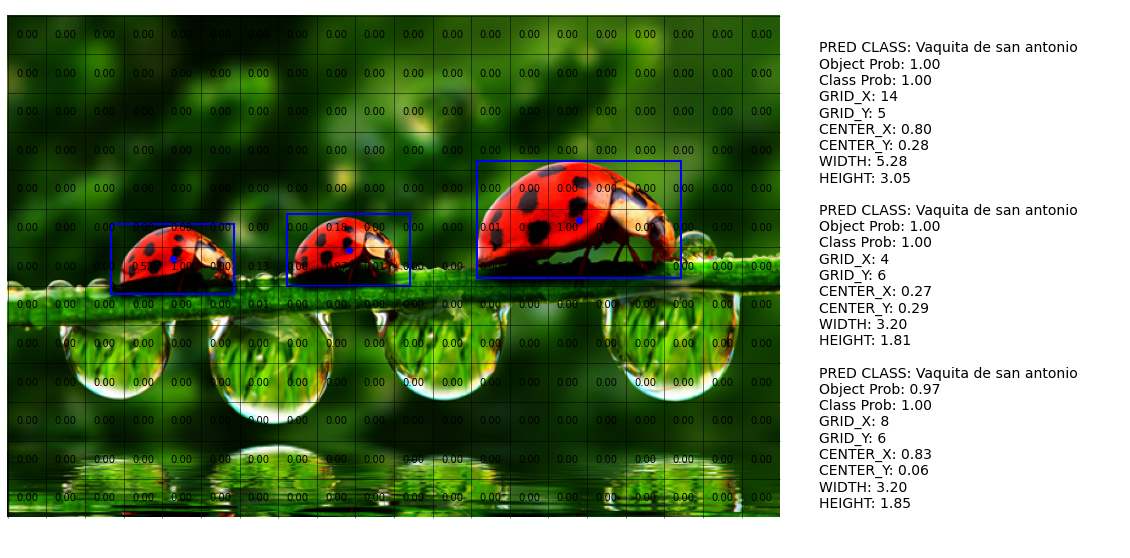

In [23]:
pred_processed = plot_bboxes(image_array[0], predictions[0], idx_2_class_id, classes_names, thres=0.97)

* Vemos como cambiando el threshold, mejoramos la precisión de las Bounding Box.